In [24]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats as st


In [25]:
trainset=pd.read_csv('C:/Users/teena/OneDrive/Desktop/data science and machine learning/In-class exercise/CreditData/CreditData/Credit_train.csv')

In [26]:
trainset.head()

,BUSAGE,BUSTYPE,MAXLINEUTIL,DAYSDELQ,TOTACBAL,DEFAULT
0,183.0,B,0.0,0.0,0.24,N
1,271.0,E,0.0,0.0,1.37,N
2,51.0,A,0.0,0.0,1.52,N
3,208.0,A,0.0,0.0,1.64,N
4,148.0,A,0.0,0.0,1.78,N


In [27]:
trainset.shape

(28427, 6)

In [29]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28427 entries, 0 to 28426
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BUSAGE       28235 non-null  float64
 1   BUSTYPE      28427 non-null  object 
 2   MAXLINEUTIL  24284 non-null  float64
 3   DAYSDELQ     27961 non-null  float64
 4   TOTACBAL     19224 non-null  float64
 5   DEFAULT      28427 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


In [30]:
trainset.columns

Index(['BUSAGE', 'BUSTYPE', 'MAXLINEUTIL', 'DAYSDELQ', 'TOTACBAL', 'DEFAULT'], dtype='object')

In [31]:
trainset.describe()

,BUSAGE,MAXLINEUTIL,DAYSDELQ,TOTACBAL
count,28235.000000,24284.000000,27961.000000,19224.000000
mean,111.305224,0.387184,0.447159,23211.690307
std,103.621210,0.430665,7.041783,22711.727115
min,1.000000,0.000000,0.000000,0.240000
25%,41.000000,0.000000,0.000000,5444.747500
50%,75.000000,0.269000,0.000000,16354.570000
75%,149.000000,0.773900,0.000000,34609.692500
max,1393.000000,14.095000,548.000000,429915.710000


In [32]:
# categorical and categorical 
pd.crosstab(trainset.BUSTYPE, trainset.DEFAULT, margins=True, values=trainset.DEFAULT, aggfunc=pd.Series.count)

DEFAULT,N,Y,All
BUSTYPE,,,
A,16469,1227,17696
B,5641,511,6152
C,1917,103,2020
D,2127,149,2276
E,67,2,69
F,202,12,214
All,26423,2004,28427


<AxesSubplot:xlabel='DEFAULT', ylabel='BUSTYPE'>

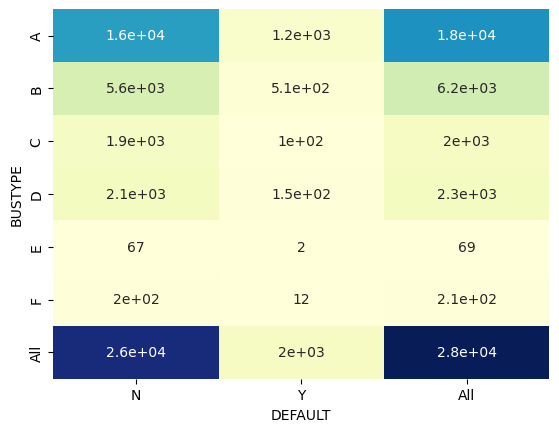

In [33]:
sns.heatmap(pd.crosstab(trainset.BUSTYPE, trainset.DEFAULT, margins=True, values=trainset.DEFAULT, aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='BUSTYPE', ylabel='TOTACBAL'>

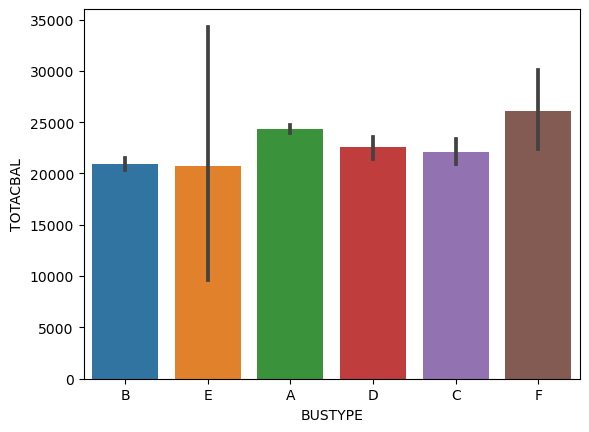

In [34]:
# categorical and numerical 
sns.barplot(x='BUSTYPE',y='TOTACBAL',data=trainset)

<AxesSubplot:xlabel='BUSTYPE', ylabel='TOTACBAL'>

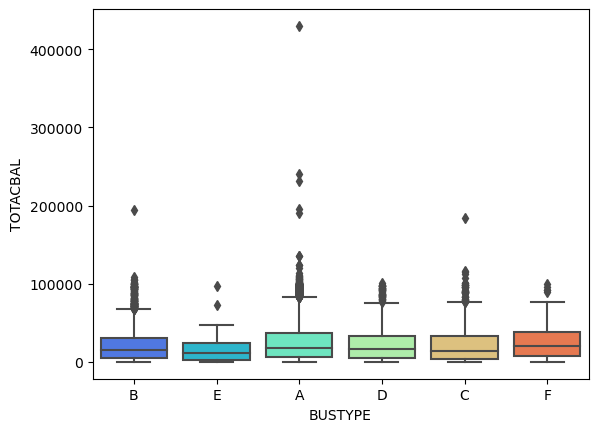

In [35]:
sns.boxplot(x='BUSTYPE',y='TOTACBAL',data=trainset,palette='rainbow')

<AxesSubplot:xlabel='BUSTYPE', ylabel='TOTACBAL'>

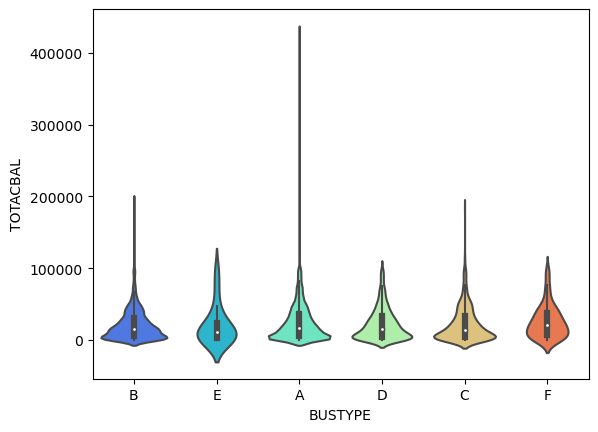

In [36]:
sns.violinplot(x='BUSTYPE',y='TOTACBAL',data=trainset,palette='rainbow')

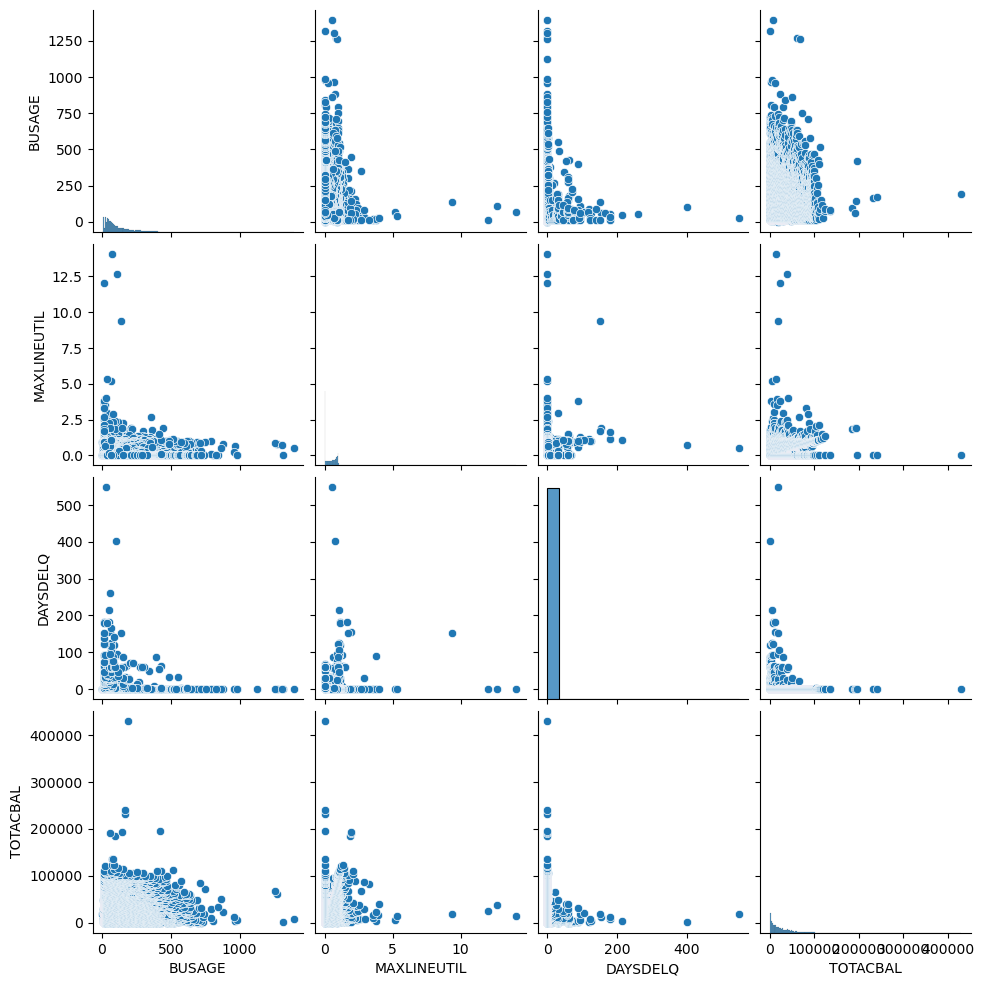

In [37]:
# numerical and numerical 
g = sns.pairplot(trainset)

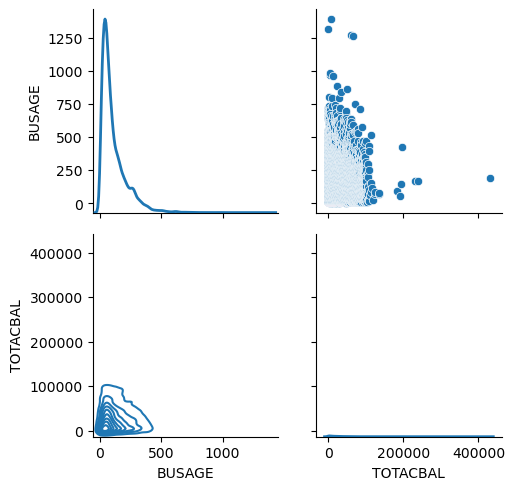

In [38]:
tr=trainset.drop(columns=['DEFAULT', 'BUSTYPE', 'MAXLINEUTIL','DAYSDELQ'])
tr.dropna(axis=0,how='any')
g = sns.PairGrid(tr)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors="C0")
g = g.map_diag(sns.kdeplot, lw=2)

In [40]:
# Chi2 test - Categorical and Categorical
contigency= pd.crosstab(trainset['DEFAULT'], trainset['BUSTYPE']) 
contigency

BUSTYPE,A,B,C,D,E,F
DEFAULT,,,,,,
N,16469,5641,1917,2127,67,202
Y,1227,511,103,149,2,12


In [41]:
contigency_pct = pd.crosstab(trainset['DEFAULT'], trainset['BUSTYPE'], normalize='index')
contigency_pct

BUSTYPE,A,B,C,D,E,F
DEFAULT,,,,,,
N,0.623283,0.213488,0.072550,0.080498,0.002536,0.007645
Y,0.612275,0.254990,0.051397,0.074351,0.000998,0.005988


<AxesSubplot:xlabel='BUSTYPE', ylabel='DEFAULT'>

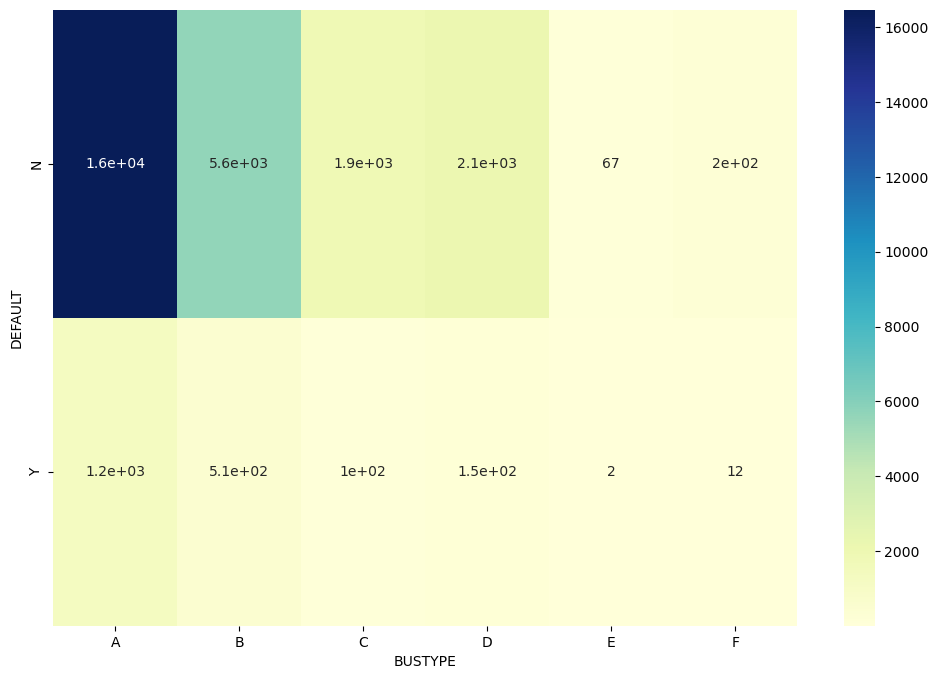

In [42]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [43]:
c, p, dof, expected = chi2_contingency(contigency) 
print(p)

1.293177637815737e-05


In [44]:
# t-test - Categorical and Numerical
tr=trainset.dropna(axis=0,how='any')
tr.describe()

,BUSAGE,MAXLINEUTIL,DAYSDELQ,TOTACBAL
count,19009.000000,19009.000000,19009.000000,19009.000000
mean,114.211847,0.478054,0.400179,23214.415733
std,104.140234,0.431787,7.129450,22677.431473
min,1.000000,0.000000,0.000000,0.240000
25%,45.000000,0.025900,0.000000,5487.110000
50%,78.000000,0.480700,0.000000,16390.370000
75%,152.000000,0.840300,0.000000,34605.740000
max,1393.000000,14.095000,548.000000,429915.710000


In [45]:
a = tr.loc[tr['BUSTYPE'] == 'A', 'TOTACBAL'].to_numpy()
b = tr.loc[tr['BUSTYPE'] == 'B', 'TOTACBAL'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=8.77235264529358, pvalue=1.9209860880165746e-18)

In [46]:
# ANOVA - Categorical and Numerical
a = tr.loc[tr['BUSTYPE'] == 'A', 'TOTACBAL'].to_numpy()
b = tr.loc[tr['BUSTYPE'] == 'B', 'TOTACBAL'].to_numpy()
c = tr.loc[tr['BUSTYPE'] == 'C', 'TOTACBAL'].to_numpy()
fvalue, pvalue = st.f_oneway(a,b,c)
print(fvalue, pvalue)

39.803234940480245 5.664552247545447e-18


In [47]:
# Linear - Numerical and Numerical
x = tr['MAXLINEUTIL'].to_numpy()
y = tr['DAYSDELQ'].to_numpy()
np.corrcoef(x, y)

array([[1.        , 0.06630208],
       [0.06630208, 1.        ]])